In [2]:
# 1 Compute eigenvalues and eigenvectors from your covariance matrix.

import numpy as np

# Step 1: Covariance matrix (manual)
data = [
    [1, 4],
    [2, 5],
    [3, 6]
]

def covariance_matrix_manual(data):
  
    n_samples = len(data)
    n_features = len(data[0])
    
    # Step 1: Compute means
    means = []
    for j in range(n_features):
        column = [data[i][j] for i in range(n_samples)]
        means.append(sum(column) / n_samples)
    
    # Step 2: Center the data
    centered = []
    for i in range(n_samples):
        row = []
        for j in range(n_features):
            row.append(data[i][j] - means[j])
        centered.append(row)
    
    # Step 3: Compute covariance matrix
    cov_matrix = []
    for i in range(n_features):
        row = []
        for j in range(n_features):
            cov = 0
            for k in range(n_samples):
                cov += centered[k][i] * centered[k][j]
            cov = cov / (n_samples - 1)
            row.append(cov)
        cov_matrix.append(row)
    
    return cov_matrix

cov_matrix = covariance_matrix_manual(data)
cov_matrix_np = np.array(cov_matrix)

# Step 2: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_np)

# Step 3: Print results
print("Covariance Matrix:")
print(cov_matrix_np)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors (columns):")
print(eigenvectors)



Covariance Matrix:
[[1. 1.]
 [1. 1.]]

Eigenvalues:
[2. 0.]

Eigenvectors (columns):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [5]:
# Sort eigenvalues in descending order and rearrange eigenvectors accordingly.
import numpy as np

# Step 1: Covariance matrix
data = [
    [1, 4],
    [2, 5],
    [3, 6]
]

def covariance_matrix_manual(data):
    n_samples = len(data)
    n_features = len(data[0])
    
    # Step 1: Compute means
    means = []
    for j in range(n_features):
        column = [data[i][j] for i in range(n_samples)]
        means.append(sum(column) / n_samples)
    
    # Step 2: Center the data
    centered = []
    for i in range(n_samples):
        row = []
        for j in range(n_features):
            row.append(data[i][j] - means[j])
        centered.append(row)
    
    # Step 3: Compute covariance matrix
    cov_matrix = []
    for i in range(n_features):
        row = []
        for j in range(n_features):
            cov = 0
            for k in range(n_samples):
                cov += centered[k][i] * centered[k][j]
            cov = cov / (n_samples - 1)
            row.append(cov)
        cov_matrix.append(row)
    
    return cov_matrix

cov_matrix = covariance_matrix_manual(data)
cov_matrix_np = np.array(cov_matrix)

# Step 2: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_np)

# Step 3: Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Step 4: Print results
print("Covariance Matrix:")
print(cov_matrix)

print("\nEigenvalues (sorted):")
print(eigenvalues_sorted)

print("\nEigenvectors (columns sorted):")
print(eigenvectors_sorted)


Covariance Matrix:
[[1.0, 1.0], [1.0, 1.0]]

Eigenvalues (sorted):
[2. 0.]

Eigenvectors (columns sorted):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [6]:
# 3 Calculate explained variance percentage for each principal component.

import numpy as np

# Suppose these are sorted eigenvalues from previous step
eigenvalues_sorted = np.array([2.0, 0.0])  

# Step 1: total variance
total_variance = np.sum(eigenvalues_sorted)

# Step 2: explained variance percentage
explained_variance_percentage = [(ev / total_variance) * 100 for ev in eigenvalues_sorted]

# Step 3: print results
for i, ev in enumerate(explained_variance_percentage):
    print(f"Principal Component {i+1} explains {ev:.2f}% of variance")


Principal Component 1 explains 100.00% of variance
Principal Component 2 explains 0.00% of variance


In [1]:
# 4 Reduce your dataset to 2 dimensions using the top 2 eigenvectors.
import numpy as np

# Step 0: Original dataset
data = np.array([
    [1, 4],
    [2, 5],
    [3, 6]
])

# Step 1: Center the data
means = np.mean(data, axis=0)
centered_data = data - means

# Step 2: Covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

# Step 3: Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Step 5: Take top 2 eigenvectors
top2_eigenvectors = eigenvectors_sorted[:, :2]  

# Step 6: Project centered data onto top 2 eigenvectors
projected_data = centered_data.dot(top2_eigenvectors) 
# Step 7: Print results
print("Original Data:")
print(data)

print("\nCentered Data:")
print(centered_data)

print("\nTop 2 Eigenvectors:")
print(top2_eigenvectors)

print("\nProjected Data (2D):")
print(projected_data)


Original Data:
[[1 4]
 [2 5]
 [3 6]]

Centered Data:
[[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]

Top 2 Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Projected Data (2D):
[[-1.41421356  0.        ]
 [ 0.          0.        ]
 [ 1.41421356  0.        ]]


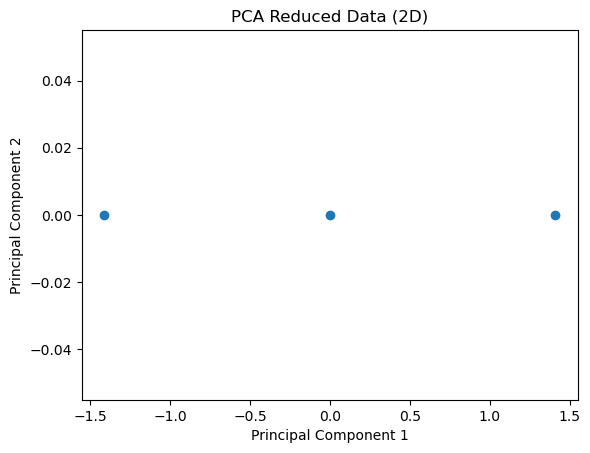

In [2]:
# 5 Plot the PCA-reduced dataset in 2D.
import matplotlib.pyplot as plt

# PCA reduced data (2D)
pca_data = [
    [-1.41, 0],
    [0.00, 0],
    [1.41, 0]
]

# Separate X and Y
x = [point[0] for point in pca_data]
y = [point[1] for point in pca_data]

# Plot
plt.scatter(x, y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Reduced Data (2D)")
plt.show()


In [6]:
# 6 Reconstruct the original dataset from PCA output and calculate reconstruction error.
import numpy as np

import numpy as np

# Original data
data = np.array([
    [1, 4],
    [2, 5],
    [3, 6]
])

# Step 1: Center the data
mean = np.mean(data, axis=0)
centered_data = data - mean

# Step 2: Covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

# Step 3: Eigenvalues & eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvectors by eigenvalues (descending)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Step 5: Use top 2 eigenvectors (PCA to 2D)
top_eigenvectors = eigenvectors_sorted[:, :2]

# Step 6: Project data to PCA space
projected_data = centered_data.dot(top_eigenvectors)

# Step 7: Reconstruct original data
reconstructed_data = projected_data.dot(top_eigenvectors.T) + mean

# Step 8: Reconstruction error (MSE)
reconstruction_error = np.mean((data - reconstructed_data) ** 2)

# Print results
print("Original Data:")
print(data)

print("\nReconstructed Data:")
print(reconstructed_data)

print("Reconstruction Error:", round(reconstruction_error, 10))

Original Data:
[[1 4]
 [2 5]
 [3 6]]

Reconstructed Data:
[[1. 4.]
 [2. 5.]
 [3. 6.]]
Reconstruction Error: 0.0
